In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple

In [2]:
DATA_PTH, OUTPUT_PTH = "data", "output"

In [3]:
def plot_two_series(series_raw: pd.Series, series_filtered: pd.Series, title: str):
    plt.figure(figsize=(10, 6))
    series_raw.plot(label='Raw data', color='blue', linewidth=2)
    series_filtered.plot(label='Filtered data', color='red', linewidth=2)
    plt.title(title)
    plt.xlabel('Timestamp')
    plt.ylabel('Signal')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [4]:
def compare(raw_signal_df: pd.DataFrame, filtered_df: pd.DataFrame) -> Tuple[Tuple[pd.Series, pd.Series], Tuple[pd.Series, pd.Series], Tuple[pd.Series, pd.Series]]:
    dmp_roll, dmp_pitch, dmp_yaw = raw_signal_df["DMP Roll"], raw_signal_df["DMP Pitch"], raw_signal_df["DMP Yaw"]
    filtered_roll, filtered_pitch, filtered_yaw = filtered_df["Filtered Roll"], filtered_df["Filtered Pitch"], filtered_df["Filtered Yaw"]
    assert dmp_roll.shape == filtered_roll.shape
    assert dmp_pitch.shape == filtered_pitch.shape
    assert dmp_yaw.shape == filtered_yaw.shape
    return (dmp_roll, filtered_roll), (dmp_pitch, filtered_pitch), (dmp_yaw, filtered_roll)

In [5]:
def main(signal_type: str):
    assert signal_type in ("roll", "pitch", "yaw")
    raw_signal_df, filtered_df = pd.read_csv(os.path.join(DATA_PTH, signal_type + ".txt")), pd.read_csv(os.path.join(OUTPUT_PTH, signal_type + ".csv"))
    roll_series, pitch_series, yaw_series = compare(raw_signal_df, filtered_df)
    if signal_type == "roll": plot_two_series(roll_series[0], roll_series[1], signal_type)
    elif signal_type == "pitch": plot_two_series(pitch_series[0], pitch_series[1], signal_type)
    else: plot_two_series(yaw_series[0], yaw_series[1], signal_type)

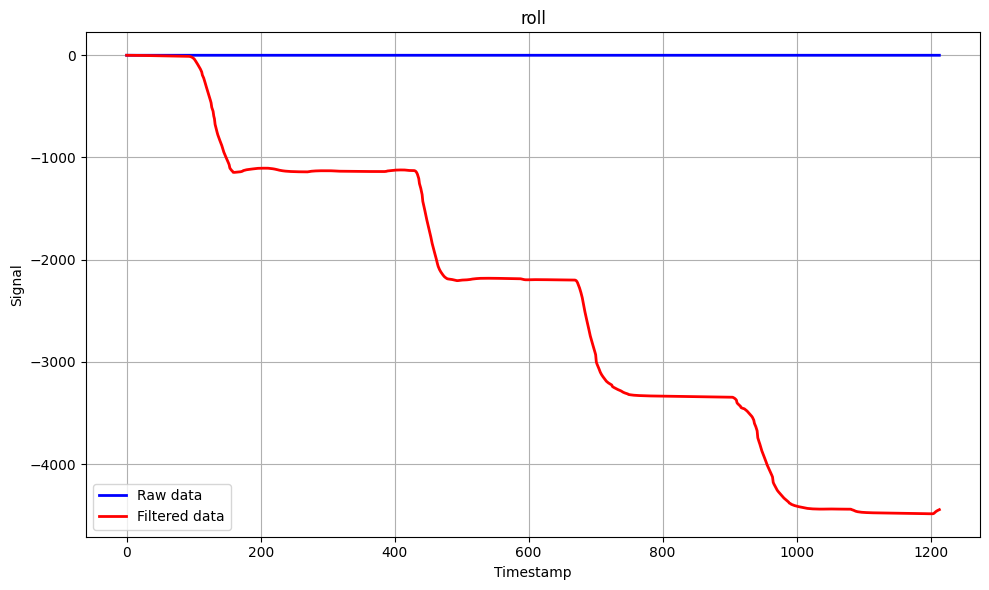

In [8]:
main("roll")